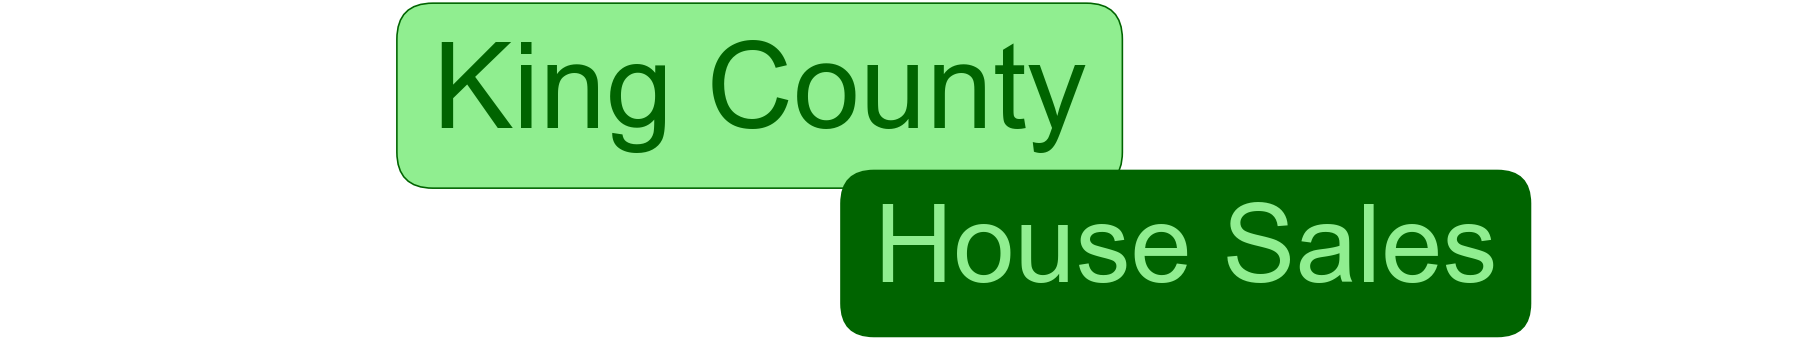

In [1]:
# Computations
import numpy as np
import pandas as pd
from scipy.stats import norm
import pickle

# sklearn
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex, clear_output

## seaborn
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})


## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
import matplotlib.colors
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (17, 6)
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
%matplotlib inline

## plotly
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
%config InlineBackend.figure_format = 'retina' 

import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 1, figsize= (16,3))
_ = ax.text(0.4, .8, "King County", color = 'DarkGreen', size=60, rotation=0.,ha="center", va="center",
            bbox=dict(boxstyle="round", ec='DarkGreen',fc='LightGreen'))

_ = ax.text(.9, .4, "House Sales", size=55, color = 'LightGreen', rotation=0.,ha="right", va="top",
            bbox=dict(boxstyle="round", ec='DarkGreen',fc='DarkGreen'))
_ = ax.axis('tight')
_ = ax.axis('off')

# King County House Sales

In this study, we analyze and create statistical models using a dataset from [Kaggle.com](https://www.kaggle.com/shivachandel/kc-house-data). This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


<div class="alert alert-block alert-info">
<font size="+2"><b>
House Sales in King County Dataset
</b></font>
</div>


### Data Description

Online property companies offer valuations of houses using machine learning techniques. This report aims to predict house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015. We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”
The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle*. This data was published/released under CC0*: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography. The dataset consisted of 21 variables and 21613 observations.

### Data Columns
Attribute Information (in order):
    
| Attribute | Information | Attribute | Information |
|-------------|------------------------------------|---------------|----------------------------------------------------------------|
| id | Identification number of the house | grade | Grade given to the house |
| date | Date of the acquired information | sqft_above | The square footage of the up part of the house |
| price | Price of the house | sqft_basement | The square footage of the basement |
| bedrooms | The number of bedrooms in a house | yr_built | Built year |
| bathrooms | The number of bathrooms in a house | yr_renovated | The last renovation year |
| sqft_living | Square footage of the living area | zipcode | Zipcode |
| sqft_lot | Square footage of the lot area | lat | Latitude of the house |
| floors | The number of floors in the house | long | Longitude of the house |
| waterfront | If it has waterfront | sqft_living15 | The square footage of the living area of the 15 nearest houses |
| view | If it has view | sqft_lot15 | The square footage of the lot area of the 15 nearest houses |
| condition | Condition of the house |  |  |

Creating a dictionary for later analysis:

In [2]:
Dict = {'id':'Identification number of the house',
        'date':'Date of the aquired information',
        'price':'Price of the house',
        'bedrooms':'The number of bedrooms in a house',
        'bathrooms':'The number of bathrooms in a house',
        'sqft_living':'Square footage of the living area',
        'sqft_lot':'Square footage of the lot area',
        'floors':'The number of floors in the house',
        'waterfront':'If it has water front',
        'view':'If it has view',
        'condition':'Condition of the house',
        'Attribute':'Information',
        'grade':'Grade given to the house',
        'sqft_above':'The square footage of the up part of the house',
        'sqft_basement':'The square footage of the basement',
        'yr_built':'Built year',
        'yr_renovated':'The last renovation year',
        'zipcode':'Zipcode',
        'lat':'Latitude of the house',
        'long':'Longitude of the house',
        'sqft_living15':'The square footage of the living area of the 15 nearest houses',
        'sqft_lot15':'The square footage of the lot area of the 15 nearest houses'}

In [3]:
Path = 'KCData/kc_house_data_mod.csv'
Data = pd.read_csv(Path)
display(Data.head())

id        date  year     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  2014  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  2014  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  2015  180000.0         2       1.00          770   
3  2487200875  2014-12-09  2014  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0  ...      7      1180.0              0   
1      7242     2.0           0  ...      7      2170.0            400   
2     10000     1.0           0  ...      6       770.0              0   
3      5000     1.0           0  ...      7      1050.0            910   
4      8080     1.0           0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 22 columns]

# The Variance of the Features

In [4]:
df = pd.get_dummies(Data['year'])
df = pd.concat([Data, df], axis = 1)
df = df.drop(columns = ['id','date','year','lat','long','zipcode'])

# Price in Million
df['price'] =df['price']/(1e6)
Target = 'price'
df.head()

X = df.drop(columns = [Target])
y = df[Target]

Let's look at the variance of the features.

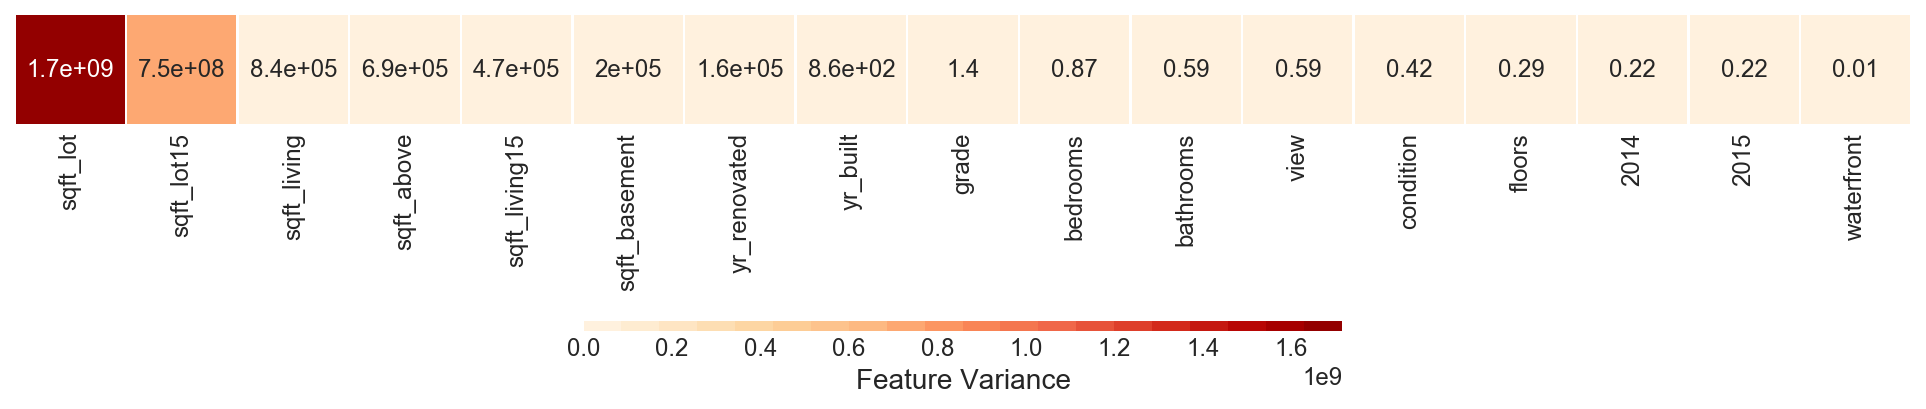

In [5]:
fig, ax = plt.subplots(figsize=(17,12))
Temp = df.drop(columns = [Target]).var().sort_values(ascending = False).to_frame(name= 'Variance').round(2).T
_ = sns.heatmap(Temp, ax=ax, annot=True, square=True,  cmap =sns.color_palette("OrRd", 20),
                  linewidths = 0.8, vmin=0, vmax=Temp.max(axis =1)[0],  annot_kws={"size": 12},
                  cbar_kws={'label': 'Feature Variance', "aspect":80, "shrink": .4, "orientation": "horizontal"})
lb = [x.replace(' ','\n').replace('\nof\n',' of\n') for x in [item.get_text() for item in ax.get_xticklabels()]]
_ = ax.set_xticklabels(lb)
_ = ax.set_yticklabels('')

High variance for some features can have a negative impact on our modeling process. For this reason, we would like to standardize features by removing the mean and scaling to unit variance.

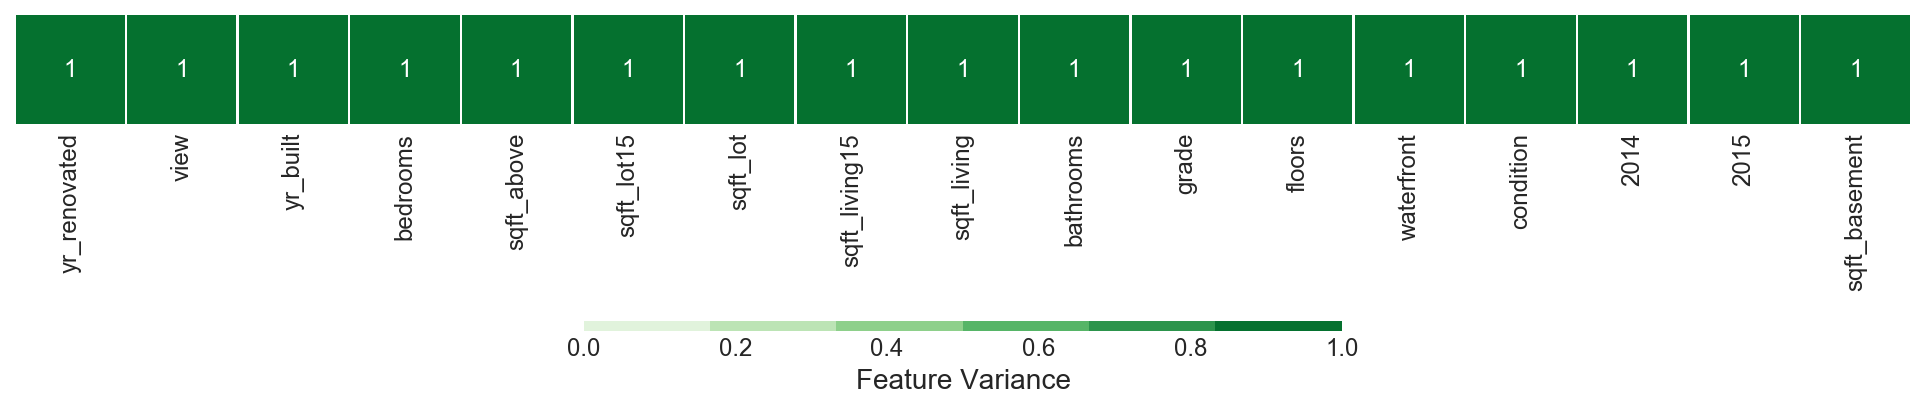

In [6]:
# Scaling
df1 = df.copy()
Temp = df.drop(columns = Target).columns.tolist()
scaler = StandardScaler()
_ = scaler.fit(df[Temp])
df1[Temp] = scaler.transform(df[Temp])

Temp = df1.drop(columns = [Target]).var().sort_values(ascending = False).to_frame(name= 'Variance').round(2).T

# Variance Plot
fig, ax = plt.subplots(figsize=(17,12))
_ = sns.heatmap(Temp, ax=ax, annot=True, square=True,  cmap =sns.color_palette('Greens'),
                  linewidths = 0.8, vmin=0, vmax=Temp.max(axis =1)[0], annot_kws={"size": 12},
                  cbar_kws={'label': 'Feature Variance', "aspect":80, "shrink": .4, "orientation": "horizontal"})
lb = [x.replace(' ','\n').replace('\nof\n',' of\n') for x in [item.get_text() for item in ax.get_xticklabels()]]
_ = ax.set_xticklabels(lb)
_ = ax.set_yticklabels('')
del df1

In [7]:
def ScoreTable(reg, X = X, y = y):
    score = cross_validate(reg, X, y, scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error'],
                       return_train_score = True, n_jobs=-1, verbose=0)
    score['test_neg_mean_absolute_error'] = -score['test_neg_mean_absolute_error']
    score['train_neg_mean_absolute_error'] = -score['train_neg_mean_absolute_error']

    Scores = pd.DataFrame(score).mean(axis = 0).map(lambda x: ('%.2f' % x)) + ' ± ' + \
            pd.DataFrame(score).std(axis = 0).map(lambda x: ('%.2e' % x))
    Scores = Scores.to_frame('Value')
    Temp = [x.replace('_',' ').title().replace('Train','Train:').replace('Test','Test:').replace('Neg','')\
            for x in Scores.index]
    Scores.index = Temp
    display(Scores)
    return score
    
def plot_regression_results(reg, RegName, X=X, y=y):
    y_pred = cross_val_predict(reg, X, y, n_jobs=-1, verbose=0)
    fig, ax = plt.subplots(figsize=(6,6))
    _ = ax.scatter(y, y_pred, facecolors='SkyBlue', edgecolors='MidnightBlue', alpha = 0.8)
    Temp = np.ceil(np.stack((y.values,y_pred), axis = 0).max())
    _ = ax.set_xlim(left = -1e-3, right = Temp)
    _ = ax.set_ylim(bottom = -1e-3, top = Temp)
    del Temp
    _ = ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [ax.get_ylim()[0], ax.get_ylim()[1]], '--r', linewidth=2)
    _ = ax.set_xlabel('Measured price ($1 \\times 10^{6}$)', fontsize=14)
    _ = ax.set_ylabel('Predicted price ($1 \\times 10^{6}$)', fontsize=14)
    _ = ax.set_title(RegName, fontsize = 18)
    _ = plt.tight_layout()
    
Estimators = []
TestR2 = {}

For the sake of creating an end-to-end model, pipeline, that can predict the price for a given set of data. We embed this scaling inside of our model using pipelining.

# Regressors

In this section, we test a number of efficient scikit-learn regressors. Then from those that have performed well, a stacked model can be formed. In particular, we use the following models:

In [8]:
Regressors = {'Bagging Regressorr': BaggingRegressor(), 'Decision Tree Regression': DecisionTreeRegressor(),
             'Gradient Boosted Tree': GradientBoostingRegressor(), 'MLP Regressor': MLPRegressor(),
             'Random Forest Regressor': RandomForestRegressor()}

## Bagging Regressor

This regressor is one of the advanced scikit-learn regressors. For more details regarding this regressor see [sklearn.ensemble.BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html).

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor', BaggingRegressor())])

Value
Fit Time                      0.87 ± 3.36e-03
Score Time                    0.01 ± 7.07e-04
Test: R2                      0.73 ± 1.81e-02
Train: R2                     0.95 ± 1.25e-03
Test:  Mean Absolute Error    0.12 ± 3.85e-03
Train:  Mean Absolute Error   0.05 ± 2.71e-04
Test:  Mean Squared Error    -0.04 ± 3.88e-03
Train:  Mean Squared Error   -0.01 ± 2.19e-04

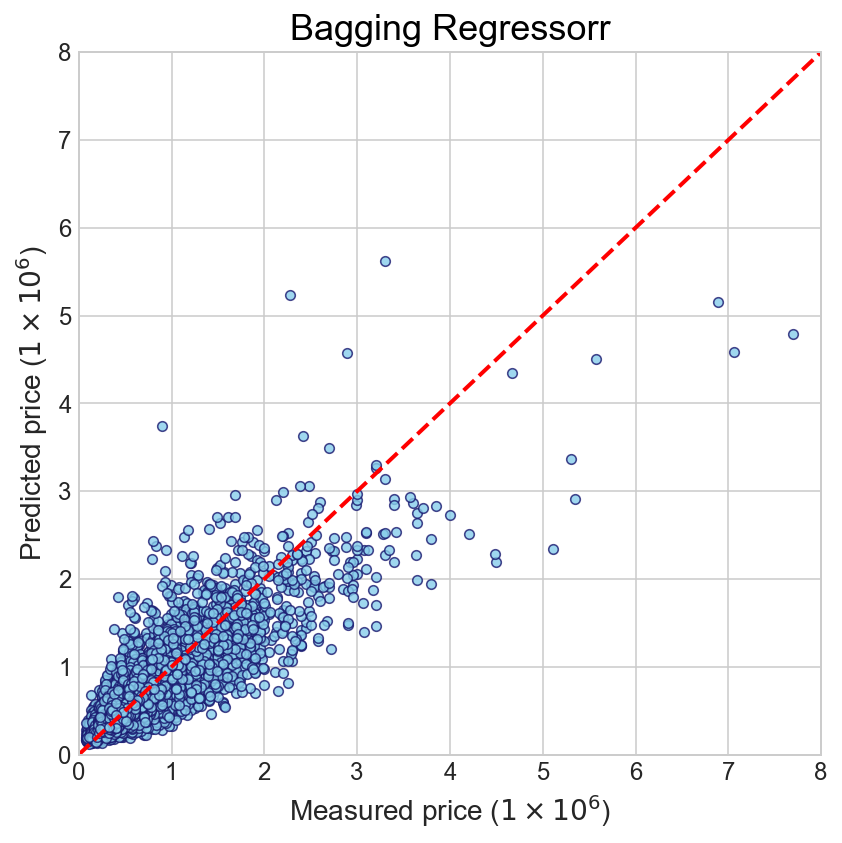

In [9]:
RegName = 'Bagging Regressorr'
reg = make_pipeline(StandardScaler(), Regressors[RegName])
display(reg)
_ = reg.fit(X, y)
#
score = ScoreTable(reg)
plot_regression_results(reg, RegName)

if score['test_r2'].mean() > .7:
    Estimators.append((RegName, reg))
    TestR2[RegName] = score['test_r2'].mean()

## Decision Tree Regression


Decision Trees (DTs) is a non-parametric supervised learning method that can be used for regressions and classifications.

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

Value
Fit Time                      0.15 ± 3.65e-03
Score Time                    0.00 ± 7.07e-04
Test: R2                      0.51 ± 3.66e-02
Train: R2                     1.00 ± 1.85e-05
Test:  Mean Absolute Error    0.16 ± 5.26e-03
Train:  Mean Absolute Error   0.00 ± 3.05e-05
Test:  Mean Squared Error    -0.07 ± 6.07e-03
Train:  Mean Squared Error   -0.00 ± 2.28e-06

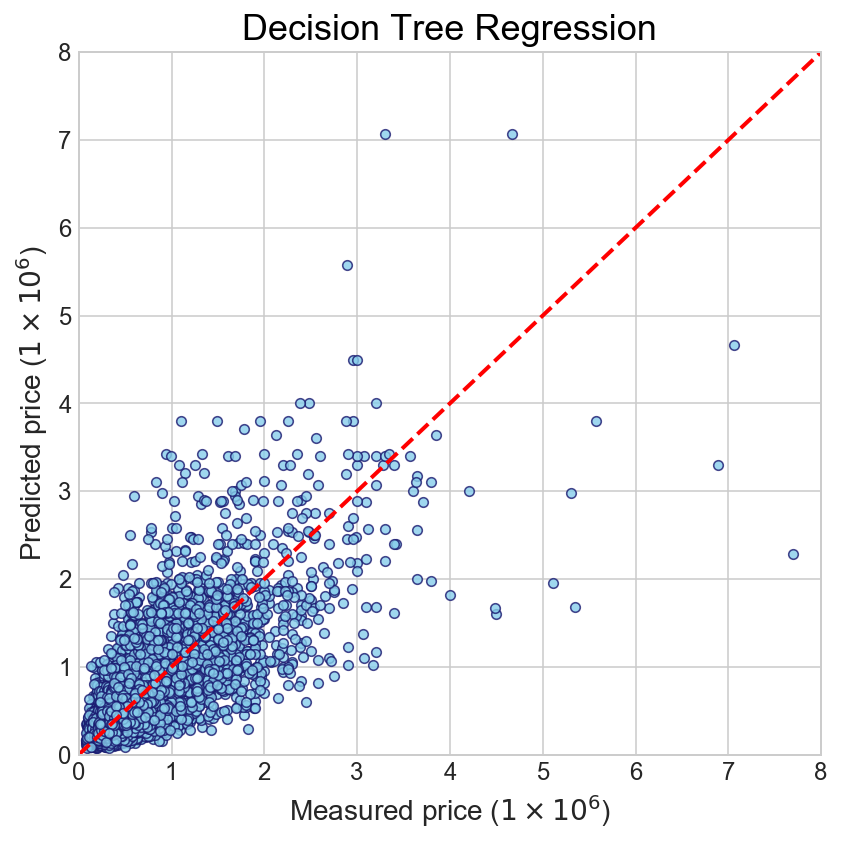

In [10]:
RegName = 'Decision Tree Regression'
reg = make_pipeline(StandardScaler(), Regressors[RegName])
display(reg)
_ = reg.fit(X, y)
#
score = ScoreTable(reg)
plot_regression_results(reg, RegName)

if score['test_r2'].mean() > .7:
    Estimators.append((RegName, reg))
    TestR2[RegName] = score['test_r2'].mean()

## Gradient Boosted Tree

Another popular machine learning technique that can be used for regression and classification problems is Gradient Boosted Tree.

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

Value
Fit Time                      2.22 ± 8.35e-03
Score Time                    0.01 ± 1.11e-06
Test: R2                      0.74 ± 1.69e-02
Train: R2                     0.80 ± 4.93e-03
Test:  Mean Absolute Error    0.12 ± 4.37e-03
Train:  Mean Absolute Error   0.12 ± 1.25e-03
Test:  Mean Squared Error    -0.04 ± 3.57e-03
Train:  Mean Squared Error   -0.03 ± 7.12e-04

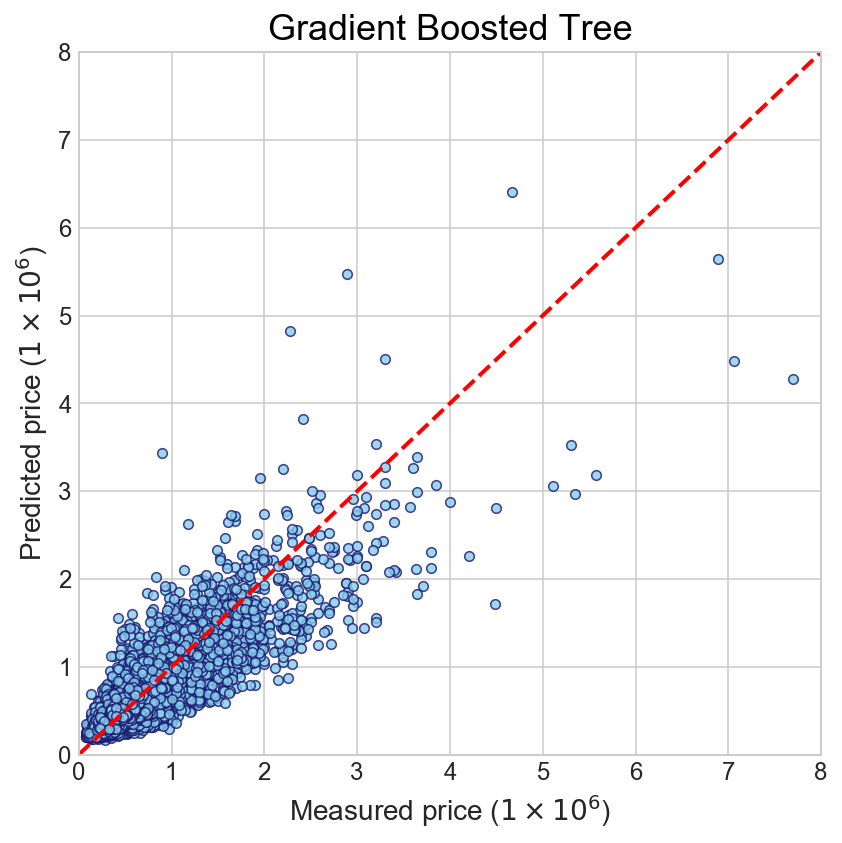

In [11]:
RegName = 'Gradient Boosted Tree'
reg = make_pipeline(StandardScaler(), Regressors[RegName])
display(reg)
_ = reg.fit(X, y)
#
score = ScoreTable(reg)
plot_regression_results(reg, RegName)

if score['test_r2'].mean() > .7:
    Estimators.append((RegName, reg))
    TestR2[RegName] = score['test_r2'].mean()

## Multi-Layer Perceptron (MLP) Regressor

See [this link](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) for more details.

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor', MLPRegressor())])

Value
Fit Time                      4.16 ± 9.40e-01
Score Time                    0.01 ± 5.48e-04
Test: R2                      0.74 ± 9.50e-03
Train: R2                     0.79 ± 8.94e-03
Test:  Mean Absolute Error    0.12 ± 3.72e-03
Train:  Mean Absolute Error   0.12 ± 1.36e-03
Test:  Mean Squared Error    -0.03 ± 3.27e-03
Train:  Mean Squared Error   -0.03 ± 7.82e-04

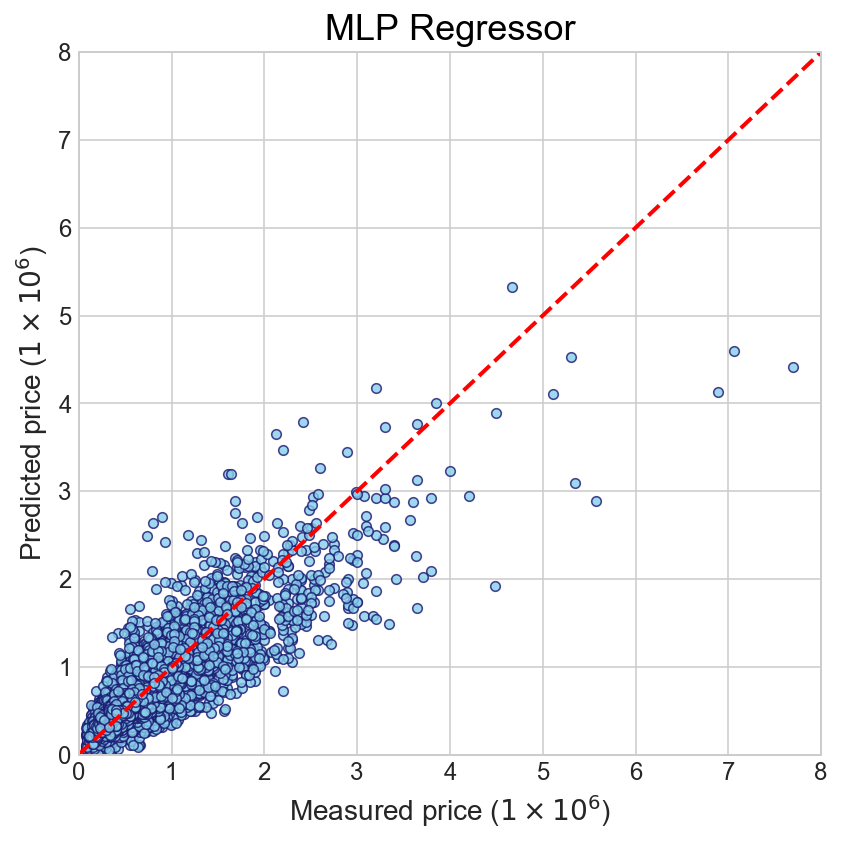

In [12]:
RegName = 'MLP Regressor'
reg = make_pipeline(StandardScaler(), Regressors[RegName])
display(reg)
_ = reg.fit(X, y)
#
score = ScoreTable(reg)
plot_regression_results(reg, RegName)

if score['test_r2'].mean() > .7:
    Estimators.append((RegName, reg))
    TestR2[RegName] = score['test_r2'].mean()

## Random Forest Regressor

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

Value
Fit Time                      8.31 ± 4.51e-02
Score Time                    0.09 ± 2.68e-03
Test: R2                      0.75 ± 1.18e-02
Train: R2                     0.97 ± 5.18e-04
Test:  Mean Absolute Error    0.12 ± 4.15e-03
Train:  Mean Absolute Error   0.04 ± 7.09e-05
Test:  Mean Squared Error    -0.03 ± 3.41e-03
Train:  Mean Squared Error   -0.00 ± 5.03e-05

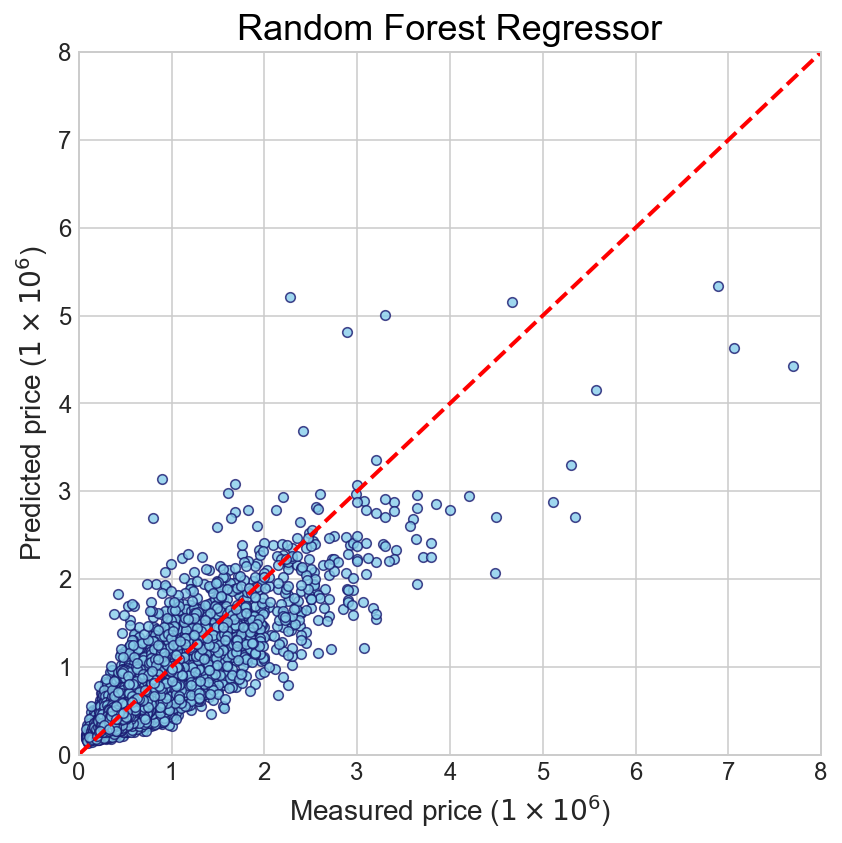

In [13]:
RegName = 'Random Forest Regressor'
reg = make_pipeline(StandardScaler(), Regressors[RegName])
display(reg)
_ = reg.fit(X, y)
#
score = ScoreTable(reg)
plot_regression_results(reg, RegName)

if score['test_r2'].mean() > .7:
    Estimators.append((RegName, reg))
    TestR2[RegName] = score['test_r2'].mean()

# Final Stacked Model

Now, we can define a stacked regressor model that uses a class of estimators and a final estimator, in our case is Random Forest Regressor. The final model, ideally, should perform better than the individual models.


StackingRegressor(estimators=[('Bagging Regressorr',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('baggingregressor',
                                                BaggingRegressor())])),
                              ('Gradient Boosted Tree',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('gradientboostingregressor',
                                                GradientBoostingRegressor())])),
                              ('MLP Regressor',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('mlpregressor',
                                                MLPRegressor())])),
                              ('Random Forest Regressor',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('randomforestregressor',
                                                RandomForestRegressor())]))],
                  final_estimator=RandomForestRegressor())

Value
Fit Time                     84.98 ± 2.47e+00
Score Time                    0.22 ± 4.83e-03
Test: R2                      0.74 ± 1.42e-02
Train: R2                     0.87 ± 9.59e-03
Test:  Mean Absolute Error    0.12 ± 4.32e-03
Train:  Mean Absolute Error   0.08 ± 1.63e-03
Test:  Mean Squared Error    -0.04 ± 4.25e-03
Train:  Mean Squared Error   -0.02 ± 1.25e-03

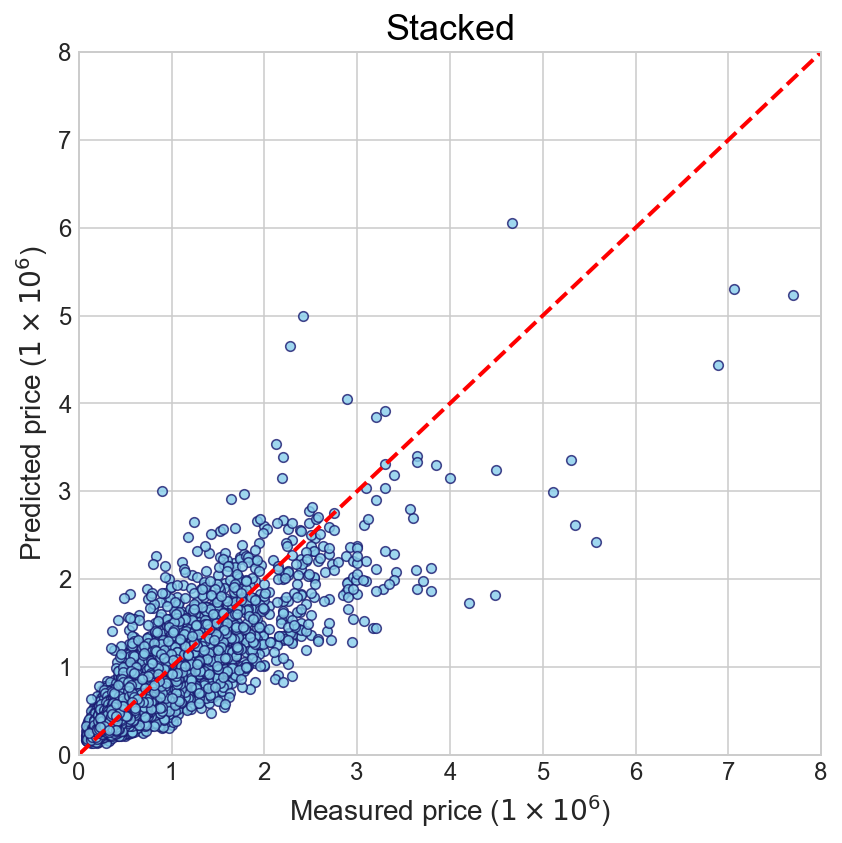

In [14]:
Temp = np.array(list(TestR2.values()))
Temp = np.where (Temp == Temp.max())[0][0]
Temp = list(TestR2.keys())[Temp]

RegName = 'Stacked'
stacked = StackingRegressor(estimators = Estimators, final_estimator = Regressors[Temp])
display(stacked)
_ = stacked.fit(X, y)
#
ScoreTable(stacked)
plot_regression_results(stacked, RegName)

We can save the stacked model to disk using
```Python
filename = Path.split('/')[0] + '/' + RegName + 'Regressor.model'
pickle.dump(stacked, open(filename, 'wb'))
```
Moreover, to load this model (for later usage), we have
```Python
loaded_model = pickle.load(open(filename, 'rb'))
print(result)
```

# Predictions

Thus, we have a model that can predict the price of a house for given input values. For example,

In [15]:
Example = df.iloc[0:1,1:]
Example.bedrooms = 4
Example.sqft_living = 600
Example.sqft_living = 2000
Example.floors = 2
Example.sqft_above = 1000
Example.yr_built = 1995
Example

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         4        1.0         2000      5650       2           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1000              0      1995             0   

   sqft_living15  sqft_lot15  2014  2015  
0           1340        5650     1     0

is estimated to have the following price.

In [16]:
Price = stacked.predict(Example)
print('Estimated Price =', round(Price[0]*(1e6),2))

Estimated Price = 353662.0


***

# Refrences
1. Breiman, L., 1996. Bagging predictors. Machine learning, 24(2), pp.123-140.
1. sklearn ensemble BaggingRegressor, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
1. Decision tree learning, https://en.wikipedia.org/wiki/Decision_tree_learning
1. James, G., Witten, D., Hastie, T. and Tibshirani, R., 2013. An introduction to statistical learning (Vol. 112, pp. 3-7). New York: springer.
1. sklearn tree DecisionTreeRegressor, https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
1. sklearn ensemble StackingRegressor, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
***